# Capstone project
This notebook is for unit 3, lesson 7 - supervised learning capstone.

I'll be using the predicting house prices data from Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [37]:
# data dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scale data
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

%matplotlib inline

In [2]:
# load the train and test data
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
# concatenate the data frames for data cleaning
df = pd.concat([train_df, test_df], sort=True)

print(df.shape)

df.head()

(2919, 81)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### About the columns
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [4]:
# move the target column to be the last one 

# save the values
target_values = df['SalePrice']

# drop the column
df = df.drop('SalePrice', axis=1)

# # add it to the end
df['SalePrice'] = target_values

# show df
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,208500.0
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,181500.0
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,223500.0
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,140000.0
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,250000.0


Since the test data is not entirely clean; the two data (test and train) are combined. Then I'll do EDA on the combined data frame, and at the end, before training, the two data frames will be split back. For that, I need to save the index of the test (or train). I'll do it next.

In [5]:
# save the test index, to be able to separate them at the end (before training)
test_idx = len(train_df)

test_idx

1460

## Data cleaning

In [6]:
# start off with a very high level
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

The dataset has many features, but it's not very large. Therefore, my strategy is to try and avoid removing rows, if possible; and later try to remove some features

The above list is a bit intimidating and not very readable. Let's work in smaller chunks. We can check the numeric columns and the objective columns

In [7]:
# numeric data frame
df_numeric = df.select_dtypes(exclude=['object'])
# object data frame
df_obj = df.select_dtypes(include=['object'])

# check if we lost any feature
print("total number of features is {}".format(len(df_numeric.columns) + len(df_obj.columns)))

total number of features is 81


In [8]:
# check the obj df first
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 43 columns):
Alley            198 non-null object
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtQual         2838 non-null object
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
Fence            571 non-null object
FireplaceQu      1499 non-null object
Foundation       2919 non-null object
Functional       2917 non-null object
GarageCond       2760 non-null object
GarageFinish     2760 non-null object
GarageQual       2760 non-null object
GarageType       2762 non-null object
Heating          2919

Alley, Fence, MiscFeature and PoolQC are missing many values. Let's dive into it; if the column has more than 90% of null values, the column will be dropped.

In [9]:
# check null percentage
for col in df_obj[['Alley', 'Fence', 'MiscFeature', 'PoolQC']]:
    print(col, ": ", (df_obj[col].isnull().sum() / len(df)))

Alley :  0.9321685508735869
Fence :  0.8043850633778691
MiscFeature :  0.9640287769784173
PoolQC :  0.9965741692360397


In [10]:
# drop Alley, MiscFeature and PoolQC
df = df.drop(['Alley', 'MiscFeature', 'PoolQC'], axis=1)
df.shape

(2919, 78)

In [11]:
# check unique values of Fence
df_obj['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

I'm not sure what each value means, but I will assume that if there is a null value, the house doesn't have a fence. So I'll add a new value 'noFence' to replace the null values

In [12]:
df['Fence'] = df['Fence'].fillna('NoFence')
df['Fence'].value_counts()

NoFence    2348
MnPrv       329
GdPrv       118
GdWo        112
MnWw         12
Name: Fence, dtype: int64

In [13]:
# get the updated object df
df_obj = df.select_dtypes(include=['object'])

Moving on; check the other objective features, see if some of them can be changed to numeric

In [14]:
for col in df_obj:
    print(col, "has these values:\n{}".format(df[col].value_counts()))

BldgType has these values:
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
BsmtCond has these values:
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
BsmtExposure has these values:
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
BsmtFinType1 has these values:
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
BsmtFinType2 has these values:
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
BsmtQual has these values:
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
CentralAir has these values:
Y    2723
N     196
Name: CentralAir, dtype: int64
Condition1 has these values:
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64
Condition2 has these

It seems that all the object features are "real" objects. Some of them have only two values (binary), but I will not make them 0 and 1, instead, I'll use dummy variables, later in the notebook. 

Continue to deal with the null values

In [15]:
# check if any row is completely null
print("Null rows: ", df_obj.isnull().all().sum())

# total nulls
df_obj.isnull().sum()

Null rows:  0


BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
BsmtQual           81
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence               0
FireplaceQu      1420
Foundation          0
Functional          2
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
Heating             0
HeatingQC           0
HouseStyle          0
KitchenQual         1
LandContour         0
LandSlope           0
LotConfig           0
LotShape            0
MSZoning            4
MasVnrType         24
Neighborhood        0
PavedDrive          0
RoofMatl            0
RoofStyle           0
SaleCondition       0
SaleType            1
Street              0
Utilities           2
dtype: int64

In [16]:
# see only the columns with null values
tmp = df[['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'FireplaceQu', 'Functional', 
           'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'KitchenQual', 'MSZoning', 'MasVnrType', 
          'SaleType', 'Utilities', 'Electrical', 'Exterior1st', 'Exterior2nd']]

for col in tmp.columns:
    print(col, "\n{}".format(tmp[col].value_counts()))

BsmtCond 
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
BsmtExposure 
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
BsmtFinType1 
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
BsmtFinType2 
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
BsmtQual 
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
FireplaceQu 
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
Functional 
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
GarageCond 
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64
GarageFinish 
Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64
GarageQual 
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64
Gar

It's hard to know what each value means in all cases. Also, since it's a string, I can't take the average amount. I can replace the null values with the most common one, but it seems not fair if, for example, the most common value is 'excellent.' Therefore, based on the values above (below col #3) I will change the null values to the most basic form; either not excite ('TA' in some columns) or something to present basic type of that feature.

In [17]:
# fill the null values
df['BsmtCond'].fillna('TA', inplace=True)
df['BsmtExposure'].fillna('No', inplace=True)
df['BsmtFinType1'].fillna('NoBsmt', inplace=True)
df['BsmtFinType2'].fillna('TA', inplace=True)
df['BsmtQual'].fillna('TA', inplace=True)
df['FireplaceQu'].fillna('TA', inplace=True)
df['Functional'].fillna('Basic', inplace=True)
df['GarageCond'].fillna('NoGarage', inplace=True)
df['GarageFinish'].fillna('NoGarage', inplace=True)
df['GarageType'].fillna('NoGarage', inplace=True)
df['GarageQual'].fillna('NoGarage', inplace=True)
df['KitchenQual'].fillna('TA', inplace=True)
df['MSZoning'].fillna('basic', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['SaleType'].fillna('Oth', inplace=True)
df['Utilities'].fillna('None', inplace=True)
df['Electrical'].fillna('Mix', inplace=True)
df['Exterior1st'].fillna('Other', inplace=True)
df['Exterior2nd'].fillna('Other', inplace=True)


# refresh the df_obj
df_obj = df.select_dtypes(include=['object'])

Next, cleaning the numeric df. Same to the object features, if a column has more than 90% null values it's gone (except for 'Saleprice' this is our target, and all the test dataset is not given, so ignore this column). 

Important to know, some of the numeric columns can be considered as continues (like '1stFlrSF') and some are categorical (such as 'GarageCars'). 

In [18]:
df_numeric.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFullBath        2
BsmtHalfBath        2
BsmtUnfSF           1
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          1
GarageCars          1
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Id                  0
KitchenAbvGr        0
LotArea             0
LotFrontage       486
LowQualFinSF        0
MSSubClass          0
MasVnrArea         23
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
ScreenPorch         0
TotRmsAbvGrd        0
TotalBsmtSF         1
WoodDeckSF          0
YearBuilt           0
YearRemodAdd        0
YrSold              0
SalePrice        1459
dtype: int64

In [19]:
# features with null values
tmp = df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars',
         'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF']]

tmp.head()

,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,GarageArea,GarageCars,GarageYrBlt,LotFrontage,MasVnrArea,TotalBsmtSF
0,706.0,0.0,1.0,0.0,150.0,548.0,2.0,2003.0,65.0,196.0,856.0
1,978.0,0.0,0.0,1.0,284.0,460.0,2.0,1976.0,80.0,0.0,1262.0
2,486.0,0.0,1.0,0.0,434.0,608.0,2.0,2001.0,68.0,162.0,920.0
3,216.0,0.0,1.0,0.0,540.0,642.0,3.0,1998.0,60.0,0.0,756.0
4,655.0,0.0,1.0,0.0,490.0,836.0,3.0,2000.0,84.0,350.0,1145.0


In [20]:
# categorical features - check values
print("BsmtFullBath:\n", df['BsmtFullBath'].unique())
print("BsmtFullBath:\n", df['BsmtFullBath'].unique())
print("GarageCars:\n", df['GarageCars'].unique())

# another sanity check
0 in df['BsmtFinSF1']

BsmtFullBath:
 [ 1.  0.  2.  3. nan]
BsmtFullBath:
 [ 1.  0.  2.  3. nan]
GarageCars:
 [ 2.  3.  1.  0.  4.  5. nan]


True

From above, it seems the the value 0 (zero) indicates that there is no such thing (for exmaple when there is no 'BsmtFinSF2' the value is 0). Thus, I'll fill the missing values with 0.

In [21]:
# fill missing values
for col in tmp.columns:
    df[col] = df[col].fillna(0)

# reset df_numeric
df_numeric = df.select_dtypes(exclude=object)

# drop target
df_numeric = df_numeric.drop('SalePrice', axis=1)

In [22]:
df_numeric.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.272011,49.565262,0.429599,0.061322,560.579993,23.098321,...,5.564577,6.089072,2.251799,16.062350,6.451524,1051.417266,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.606014,169.179104,0.524676,0.245608,439.590889,64.244246,...,1.113131,1.409947,35.663946,56.184365,1.569379,441.120498,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,5.000000,0.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.000000,0.000000,0.000000,0.000000,467.000000,0.000000,...,5.000000,6.000000,0.000000,0.000000,6.000000,989.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.000000,0.000000,...,6.000000,7.000000,0.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,9.000000,10.000000,800.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


Next, check for outliers. Two main issues that I have are: 
- the zeros 
- the scaling 

Since I assumed (and filled the values accordingly) that if a value doesn't exist, then it is 0; now I have some columns that measure year the house was built (in thousands) but also some values with 0, since it's unknown.

To deal with that I will normalize the data from 0 to 1 since negative numbers don't make sense in this case.

In [23]:
# not scaling the target
y = df['SalePrice']
df = df.drop('SalePrice', axis=1)

# scales the data
scaler = MinMaxScaler()
scaler.fit(df[df_numeric.columns])
# holds the array 
tmp = scaler.transform(df[df_numeric.columns])

# put the scaled data into the numeric columns
df[df_numeric.columns] = pd.DataFrame(tmp)

# rest the df
df_numeric = df.select_dtypes(exclude=['object'])

# check
df_numeric.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0.109641,0.413559,0.0,0.375,0.125089,0.0,0.333333,0.0,0.064212,0.000000,...,0.500,0.666667,0.0,0.0,0.461538,0.140098,0.000000,0.949275,0.883333,0.50
1,0.194917,0.000000,0.0,0.375,0.173281,0.0,0.000000,0.5,0.121575,0.000000,...,0.875,0.555556,0.0,0.0,0.307692,0.206547,0.209270,0.753623,0.433333,0.25
2,0.123083,0.419370,0.0,0.375,0.086109,0.0,0.333333,0.0,0.185788,0.000000,...,0.500,0.666667,0.0,0.0,0.307692,0.150573,0.000000,0.934783,0.866667,0.50
3,0.131695,0.366102,0.0,0.375,0.038271,0.0,0.333333,0.0,0.231164,0.268775,...,0.500,0.666667,0.0,0.0,0.384615,0.123732,0.000000,0.311594,0.333333,0.00
4,0.170342,0.509927,0.0,0.500,0.116052,0.0,0.333333,0.0,0.209760,0.000000,...,0.500,0.777778,0.0,0.0,0.538462,0.187398,0.134831,0.927536,0.833333,0.50


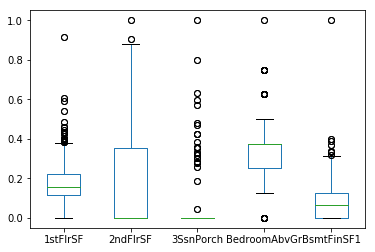

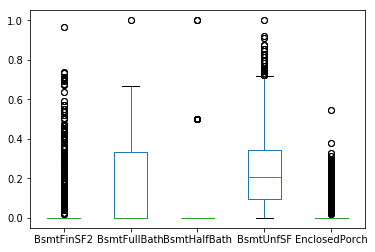

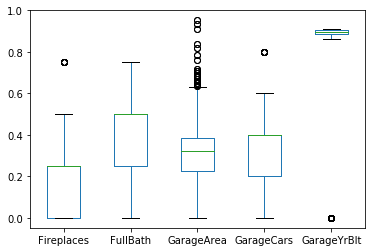

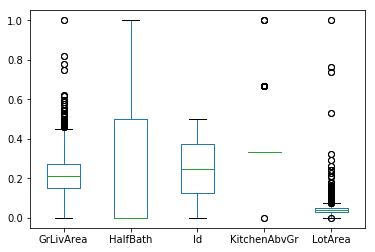

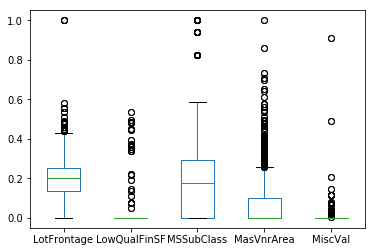

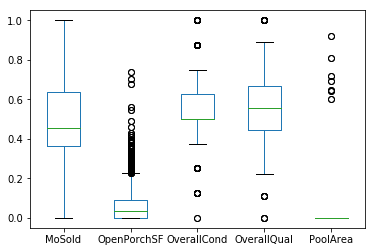

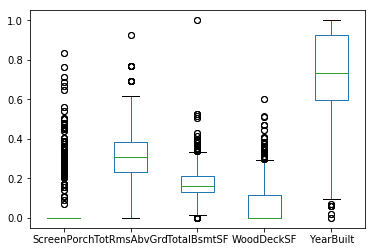

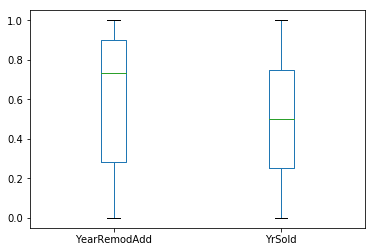

In [24]:
for i in range(1, len(df_numeric.columns) + 1):
    n = i - 5
    # prints every 5 columns together
    if i % 5 == 0 and i > 0:
        df_numeric.iloc[:, n:i].plot.box()
        plt.show()

# prints the last two columns
df_numeric.iloc[:, 35:].plot.box()

As can be seen, most of the features have outliers; most of them have many outliers. However, I won't do anything with that at the moment. I'll continue to visualize the data first, and only if I see a very "bad" outlier, it will be taking care of then. The reason is that there are many variables, some of them are "numeric categorical", some had null values which were converted to 0 and we want to keep as much information as possible. 

# Data exploration
Now I will try to explore the data a bit further to get a better insight and understanding

Starting with the most important one, out target variable - SalePrice.

Before moving forward, I'll say goodbye to the test data so we won't have any chance to overfit 

# Delete
https://www.youtube.com/watch?v=lTc7NU9XpWE

In [25]:
y = y[:test_idx]
y.shape

(1460,)

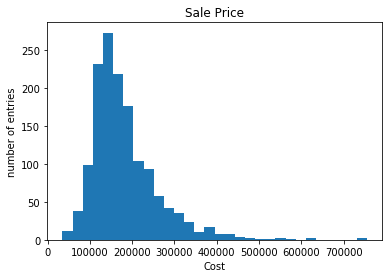

In [26]:
# histogram of Sale Price
plt.hist(y, bins=30)
plt.title("Sale Price")
plt.xlabel("Cost")
plt.ylabel("number of entries")
plt.show()

In [27]:
s = (max(y) - min(y)) / len(y)

s

493.2191780821918

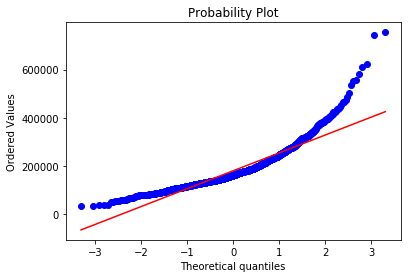

In [28]:
stats.probplot(y, plot=plt)
plt.show()

From the first plot, we can easily see that the target variable is skewed to the right. Using a normal probability plot (second plot), we confirm that the data is not normally distributed and that it seems to have some kind of curvature. Next, I'll explore which performs better, square root, or a log transform. 

It's important to get the target variable to a closer form of linear distribution since many of the ML models are taking it as an assumption. 

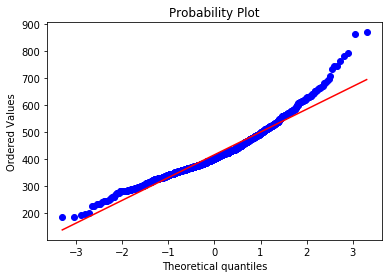

The std for y squre root is 85.7396284739667


In [60]:
# sqrt probability plot of sale price
y_sqrt = np.sqrt(y)
stats.probplot(y_sqrt, plot=plt)
plt.show()

print("The std for y squre root is",stats.norm.fit(y_sqrt)[1])

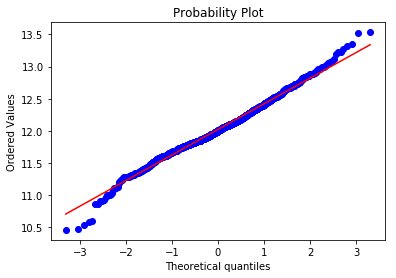

The std for y log root is 0.39931504624370256


In [59]:
# log probability plot of sale price
y_log = np.log(y)
stats.probplot(y_log, plot=plt)
plt.show()

print("The std for y log root is",stats.norm.fit(y_log)[1])

The log transofrmation is much better, therefore I'll use it.

In [63]:
y = y_log

pandas.core.series.Series